In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
import time
from LandMPC.MPCLandControl import MPCLandControl
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [3]:
sim_time = 15 # simulation length in seconds

x0 = np.array([
    0, 0, 0,
    0, 0, np.deg2rad(30),  # gamma = 30 deg
    0, 0, 0,
    3., 2., 10.  # x = 3m, y = 2m, z = 10m
])

x_ref = np.array([
    0, 0, 0,
    0, 0, 0,
    0, 0, 0,
    1., 0., 3.  # x = 1m, y = 0m, z = 3m
])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
A, B = rocket.linearize(xs, us)

# MPC parameters
H = 5.0
# Merge four linear mpc
mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_ref)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
iter 10
Minimal robust invariant set computation converged after 16 iterations.
Are the two tightened sets equal? True
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Maximum invariant set successfully computed after 8 iterations.

Iteration 1...

Simulating time 0.00


c:\Users\tancr\miniconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



 State alpha violation: 0.22 > 0.17, 
 State alpha violation: 0.27 > 0.17, 
 State alpha violation: 0.28 > 0.17, 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.26 > 0.17, 
 State beta violation: -0.22 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
 State beta violation: -0.22 < -0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State alpha violation: 0.20 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
 State beta violation: -0.18 < -0.17, Simulating time 1.00

 State beta violation: -0.18 < -0.17, 
 State beta violation: 0.17 > 0.17, 
 State beta violation: 0.18 > 0.17, 
 State beta violation: 0.18 > 0.17, 
 State beta violation: 0.18 > 0.17, Simulating time 2.00
Simulating time 3.00
Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00
Simulating time 8.00
Simulating time 9.00
Simulating time 10.00
Simulating time 11.00
Simulating time 12.00
Simulating time 13.0

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

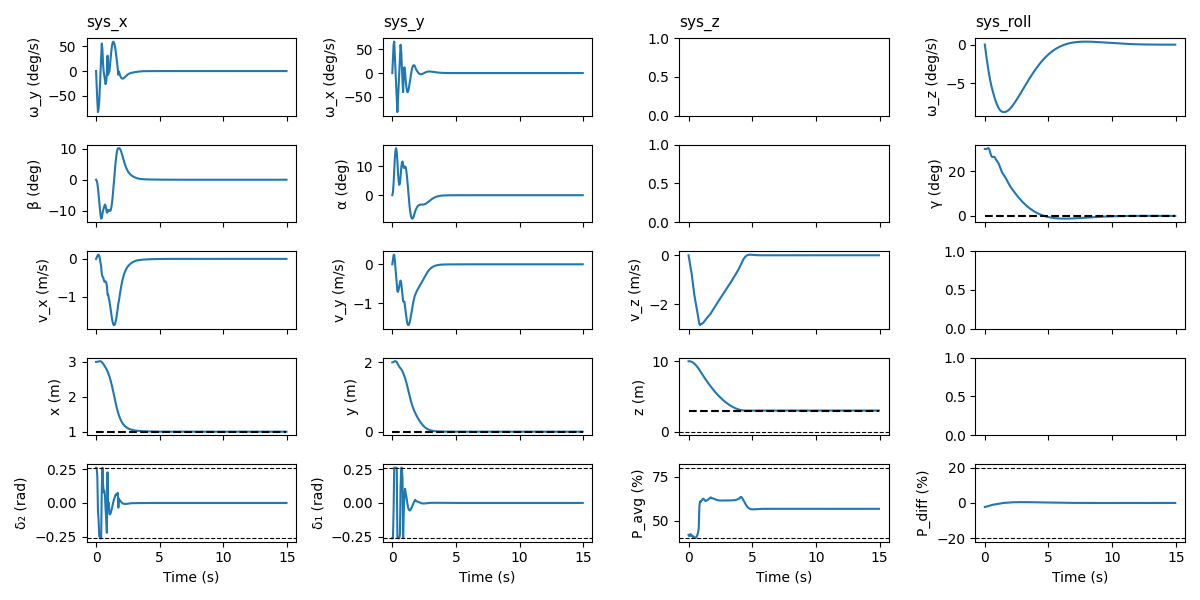

In [4]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)